In [1]:
from analysis_code.CRDS_analysis import CRDS_analysis
from analysis_code.CRDS_Fit import CRDS_Fit

import pickle
import pandas as pd
import matplotlib.pyplot as plt

HAPI version: 1.1.0.9.6
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005


In [2]:
DATA_FILE_NAME = '25torr-2-6-2020-30ppm.pkl'
VACUUM_FILE_NAME = 'empty-2-3-2020-30ppm.pkl'

HITRAN_LINE_FOLDER = 'hitranLineFiles/'

dat = pickle.load(open(DATA_FILE_NAME,'rb'),encoding='latin1')
datVacuum = pickle.load(open(VACUUM_FILE_NAME,'rb'),encoding='latin1')

In [3]:
#Temperature in kelvin, and pressure in atmospheres
temperature, pressureAtm = 296.0, 25.0/760.15

#Specify target molecules and isotopologues
plotMolecules = ['CH4', 'H2O']#, 'CO2']
isotopologues = [1,     1]#,      1]

#Molecules not in HITRAN
externalMolecules = ['acetone']
#externalMolecules = []

In [4]:
def coeffConv(c):
    return [c[2] + c[3]*110**2 + c[4]*20**2 + c[5]*20*110,
            c[1] - 220*c[3] - c[5]*20,
            c[0] - 40*c[4] - 110*c[5],
            c[3], c[4], c[5]]

#Convert coefficients from old script
#wlCoeffs = coeffConv([ 1.05701101e-01,  2.15616279e-02,  1.66901052e+03, 1.40821749e-03,-2.17481379e-05, -5.42981253e-06])

#Coefficients from ambient air data
wlCoeffs = [ 1.68599936e+03, -2.87795491e-01,  1.07155761e-01,  1.40792544e-03, -2.45998507e-05, -5.13886331e-06]

In [5]:
ca = CRDS_analysis(dat,datVacuum,wlCoeffs)

Current Scan range:	109.6 to 110.0	mA
Temperature Scan range:	1.5 to 34.1	C

Scan Points: 1301

Total Scan Time: 2 hours, 0 mins, 48 sec


In [6]:
ca.wavelength(29,120)

1674.8069727662426

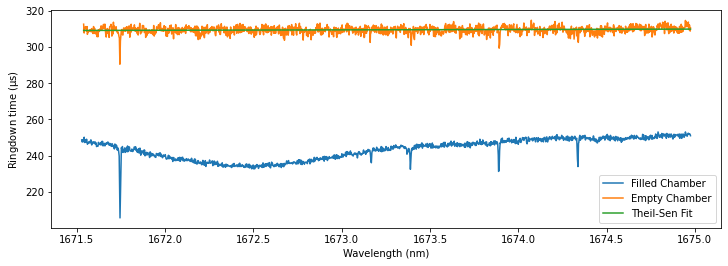

In [7]:
ca.plotDataAndVacuumFit()

In [8]:
#ca.plotTemperatureSlices()

In [9]:
%%capture
##Compute cross sections from HITRAN simulation
hf = CRDS_Fit()
hf.wl_start = 1663.0
hf.wl_end   = 1683.0
hf.computeHitranBasis(plotMolecules, isotopologues, 
                      temperature, pressureAtm,
                      fit_offset = False,
                      external_fit = externalMolecules)

# Wavelength Coefficient Fitting

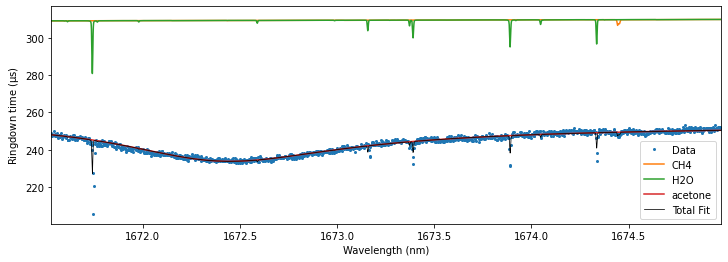

In [10]:
%%capture --no-display
#Display reseult before any wavelength fitting
ca.plotWavlengthFit(wlCoeffs,hf)

In [11]:
res = ca.fitWavelengthCoefficients(wlCoeffs,hf)
res

[ 1.68599936e+03 -2.87795491e-01  1.07155761e-01  1.40792544e-03
 -2.45998507e-05 -5.13886331e-06]
3.9700e-09
[ 1.77029933e+03 -2.87795491e-01  1.07155761e-01  1.40792544e-03
 -2.45998507e-05 -5.13886331e-06]
2.1388e-08
[ 1.68599936e+03 -3.02185266e-01  1.07155761e-01  1.40792544e-03
 -2.45998507e-05 -5.13886331e-06]
1.7868e-07
[ 1.68599936e+03 -2.87795491e-01  1.12513549e-01  1.40792544e-03
 -2.45998507e-05 -5.13886331e-06]
5.2167e-09
[ 1.68599936e+03 -2.87795491e-01  1.07155761e-01  1.47832171e-03
 -2.45998507e-05 -5.13886331e-06]
4.4466e-08
[ 1.68599936e+03 -2.87795491e-01  1.07155761e-01  1.40792544e-03
 -2.58298432e-05 -5.13886331e-06]
3.9609e-09
[ 1.68599936e+03 -2.87795491e-01  1.07155761e-01  1.40792544e-03
 -2.45998507e-05 -5.39580648e-06]
3.9493e-09
[ 1.71409935e+03 -2.73405716e-01  1.08941690e-01  1.43139086e-03
 -2.50098482e-05 -5.22451103e-06]
2.1387e-08
[ 1.72346601e+03 -2.82998899e-01  1.09537000e-01  1.34535098e-03
 -2.51465140e-05 -5.25306027e-06]
2.1388e-08
[ 1.714099

 final_simplex: (array([[ 1.68598277e+03, -2.87839959e-01,  1.07999008e-01,
         1.40893338e-03, -5.38270150e-05, -2.84667339e-06],
       [ 1.68598277e+03, -2.87839959e-01,  1.07999010e-01,
         1.40893338e-03, -5.38270180e-05, -2.84667313e-06],
       [ 1.68598277e+03, -2.87839959e-01,  1.07999009e-01,
         1.40893338e-03, -5.38270143e-05, -2.84667346e-06],
       [ 1.68598277e+03, -2.87839959e-01,  1.07999009e-01,
         1.40893338e-03, -5.38270132e-05, -2.84667355e-06],
       [ 1.68598277e+03, -2.87839959e-01,  1.07999010e-01,
         1.40893338e-03, -5.38270097e-05, -2.84667388e-06],
       [ 1.68598277e+03, -2.87839959e-01,  1.07999010e-01,
         1.40893338e-03, -5.38270191e-05, -2.84667302e-06],
       [ 1.68598277e+03, -2.87839959e-01,  1.07999009e-01,
         1.40893338e-03, -5.38270172e-05, -2.84667319e-06]]), array([1.53443594e-09, 1.53443595e-09, 1.53443595e-09, 1.53443595e-09,
       1.53443595e-09, 1.53443595e-09, 1.53443595e-09]))
           fun: 1.53

In [12]:
#Try to fit again if no convergence
if(not res['success']):
    res = ca.fitWavelengthCoefficients(res['x'],hf)
    print(res)

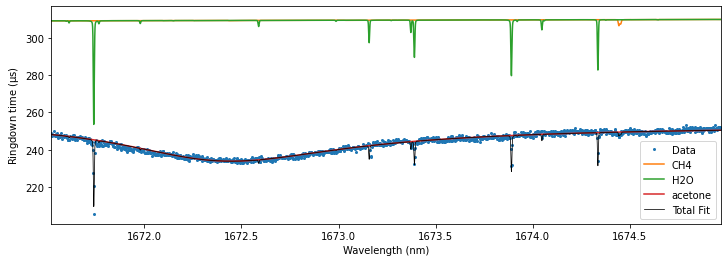

In [13]:
%%capture --no-display
#Plot results of wavelength coefficient fitting
ca.plotWavlengthFit(res['x'],hf)

In [14]:
#Before wavelength fitting
ca.getConcentrationTable(hf,wlCoeffs)

,Molecule,Isotopologue ID,Isotopologue Name,Calculated Concentration (ppm)
0,CH4,1.0,(12C)H4,0.047441
1,H2O,1.0,H2(16O),645.336826
2,acetone,NaN,,32.191708


In [15]:
#After wavelength fitting
ca.getConcentrationTable(hf,res['x'])

,Molecule,Isotopologue ID,Isotopologue Name,Calculated Concentration (ppm)
0,CH4,1.0,(12C)H4,0.050406
1,H2O,1.0,H2(16O),1403.993667
2,acetone,NaN,,32.152223


# HDF5 File Output

In [16]:
HDF5_FILE_NAME = 'HDF5_' + DATA_FILE_NAME.replace('.pkl','') + '.hdf5'

In [17]:
ca.hdfFileExport(res['x'],hf,HDF5_FILE_NAME,DATA_FILE_NAME,VACUUM_FILE_NAME)